# Data

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

## 01 data loading

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
base_path = os.path.dirname(os.path.dirname(os.getcwd()))
x_mix_path = os.path.join(base_path,os.getenv("X_MIX_LABEL"))
y_mix_path = os.path.join(base_path,os.getenv("Y_LABEL"))

In [4]:
# 讀取 x 和 y 的資料
x_mix_gdp = pd.read_csv(x_mix_path)
y_mix_gdp = pd.read_csv(y_mix_path)

In [5]:
x_mix_gdp

,年份,季別,平均匯率(元/美元),國內投資毛額,投資率,工業生產指數,製造業銷售量指數,電力(企業)總用電量(十億度),進口物價基本分類指數,出口物價基本分類指數,...,消費者物價指數,失業率,就業人數（千人）,總人口數(千人),景氣領先指標綜合指數(點),景氣同時指標綜合指數(點),gdp,gdp_t1,gdp_t2,gdp_t3
0,1982,1,37.91,102048,22.10,27.57,30.02,4.85,231.63,311.21,...,129.59,3.42,15826.00,42389.67,28.72,30.21,461774,NaN,NaN,NaN
1,1982,2,38.78,143589,29.41,30.35,33.54,5.46,231.87,315.17,...,130.53,4.12,15577.33,42570.33,28.81,29.00,488234,461774.0,NaN,NaN
2,1982,3,39.65,117934,24.09,30.06,32.76,5.81,234.50,317.22,...,133.10,5.75,16000.33,42742.00,28.50,28.87,489504,488234.0,461774.0,NaN
3,1982,4,40.15,144192,28.92,29.86,32.70,5.66,234.53,315.38,...,132.11,6.41,16146.33,42952.67,29.05,29.58,498511,489504.0,488234.0,461774.0
4,1983,1,39.97,99632,20.11,29.28,31.80,5.21,227.62,309.54,...,132.95,7.15,16260.67,43145.67,31.46,30.78,495361,498511.0,489504.0,488234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2023,4,31.84,1471478,23.06,215.34,209.11,32.09,263.75,261.96,...,249.07,7.88,26996.00,54258.33,215.93,210.73,6380686,6016101.0,5710934.0,5489013.0
168,2024,1,31.45,1536850,25.15,201.14,198.12,29.21,257.70,256.74,...,249.37,7.83,27019.33,54276.00,224.50,216.45,6111775,6380686.0,6016101.0,5710934.0
169,2024,2,32.35,1748574,28.05,217.22,215.02,32.97,265.20,264.72,...,250.43,7.83,27021.67,54265.67,229.75,223.13,6233160,6111775.0,6380686.0,6016101.0
170,2024,3,32.30,1666148,25.88,232.00,224.60,35.49,264.42,264.66,...,252.41,8.07,27092.00,54252.33,233.64,228.73,6437479,6233160.0,6111775.0,6380686.0


In [6]:
x_mix_gdp = x_mix_gdp.drop(columns=["gdp_t2","gdp_t3"])

In [7]:
y_mix_gdp

,年份,季別,GDP
0,1982,1,461774
1,1982,2,488234
2,1982,3,489504
3,1982,4,498511
4,1983,1,495361
...,...,...,...
167,2023,4,6380686
168,2024,1,6111775
169,2024,2,6233160
170,2024,3,6437479


In [8]:
x_mix_gdp_drop=x_mix_gdp.drop(columns=['年份', '季別'])
y_mix_gdp_drop=y_mix_gdp.drop(columns=['年份', '季別'])

## 02 data MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

T3_X_scaled = scaler_X.fit_transform(x_mix_gdp_drop)
T3_y_scaled = scaler_y.fit_transform(y_mix_gdp_drop)

## 03 Feaature with T3

- T3_X_scaled 
- T3_y_scaled

In [11]:
T3_x,T3_y=[],[]


for i in range(4,len(T3_X_scaled)):
    T3_x.append([T3_X_scaled[i-1],T3_X_scaled[i-2],T3_X_scaled[i-3]])

for i in range(4,len(T3_y_scaled)):
    T3_y.append([T3_y_scaled[i]])


T3_x=np.array(T3_x)
T3_x=T3_x.reshape(T3_x.shape[0], -1)

T3_y=np.array(T3_y)
T3_y=T3_y.reshape(T3_y.shape[0], -1)

In [12]:
T3_x.shape

(168, 57)

In [13]:
T3_y.shape

(168, 1)

## 04 data spliting 80 & 20

In [14]:
train_size = int(len(T3_x) * 0.8)

In [15]:
train_x_t3, test_x_t3 = T3_x[:train_size], T3_x[train_size:]
train_y_t3, test_y_t3 = T3_y[:train_size], T3_y[train_size:]

In [16]:
len(train_x_t3)

134

In [17]:
len(train_y_t3,)

134

In [18]:
len(test_x_t3)

34

In [19]:
len(test_y_t3)

34

In [20]:
# training data start in 1983 Q1
train_y_t3[0]

array([0.0052904])

In [21]:
# training data stop in 2015 Q3
train_y_t3[-1]

array([0.59805036])

In [22]:
# testing data start in 2015 Q4
test_y_t3[0]

array([0.61935846])

In [23]:
# testing data start in 2023 Q4
test_y_t3[-1]

array([1.])

In [20]:
real_train_y = scaler_y.inverse_transform(train_y_t3)
real_test_y = scaler_y.inverse_transform(test_y_t3)

# Model

- training data (train_y_t3 & train_x_t3) : 1982 q4 to 2015 q3 (132)
    - train_x_t3_scaled (x)

- testing data (test_y_t3 & test_x_t3) : 2015 q4 to 2023 q4 (33)
    - test_x_t3_scaled (x)


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [22]:
# 評估
def eval_metrics(y_true, y_pred, name=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} ➤ MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    return mse, rmse, mae

In [23]:
def plot_gdp_forecast(year,name, test_actual, test_pred):
    plt.figure(figsize=(16, 7))

    # 畫出四條線
    plt.plot(year.iloc[138:],test_actual, label='Test Actual', color='green', linestyle='-')
    plt.plot(year.iloc[138:],test_pred, label='Test Predicted', color='orange', linestyle='--')

    # 標題與座標軸
    plt.title(f'GDP Forecast with {name}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('GDP Value', fontsize=14)

    plt.xticks(year[138:],rotation=45)
    
    # 顯示圖例
    plt.legend()

    # 顯示網格
    plt.grid(True, linestyle='--', alpha=0.7)

    # 顯示圖片
    plt.show()

## GB

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [500, 1000],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [6,12],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 5],
    "subsample": [0.7,0.95],
    "max_features": [0.8, 1.0]
}
gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(train_x_t3, train_y_t3)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.8s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.0s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.9s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.0s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.0s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.9s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.9s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   5.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   5.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.8s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   5.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.8s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   7.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.9s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.9s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   7.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.6s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.9s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   6.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   5.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   6.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   4.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   5.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [6, 12], 'max_features': [0.8, 1.0], 'min_samples_leaf': [3, 5], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [29]:
print("✅ 最佳參數組合：", grid_search.best_params_)
print("📉 最佳分數（MSE）：", -grid_search.best_score_)

✅ 最佳參數組合： {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 1000, 'subsample': 0.95}
📉 最佳分數（MSE）： 0.0028149775524672427


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:

gb_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=3,
    subsample=0.95,
    max_features=1.0,
    random_state=42
)
gb_model.fit(train_x_t3, train_y_t3)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,1000
,subsample,0.95
,criterion,'friedman_mse'
,min_samples_split,10
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,6
,min_impurity_decrease,0.0
,init,None


In [26]:
# 預測
gb_y_train_pred = gb_model.predict(train_x_t3)
gb_y_test_pred = gb_model.predict(test_x_t3)


gb_y_train_pred = scaler_y.inverse_transform(gb_y_train_pred.reshape(-1, 1))
gb_y_test_pred = scaler_y.inverse_transform(gb_y_test_pred.reshape(-1, 1))

In [27]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, gb_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, gb_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 0.01, RMSE: 0.09, MAE: 0.07

📊 測試集表現：
Test ➤ MSE: 1306079519711.33, RMSE: 1142838.36, MAE: 906834.67


(1306079519711.3284, 1142838.3611479483, 906834.6715139983)

In [28]:
print(f"\n📊 預測的平均值：{gb_y_test_pred.mean():.2f}")


📊 預測的平均值：4334571.21


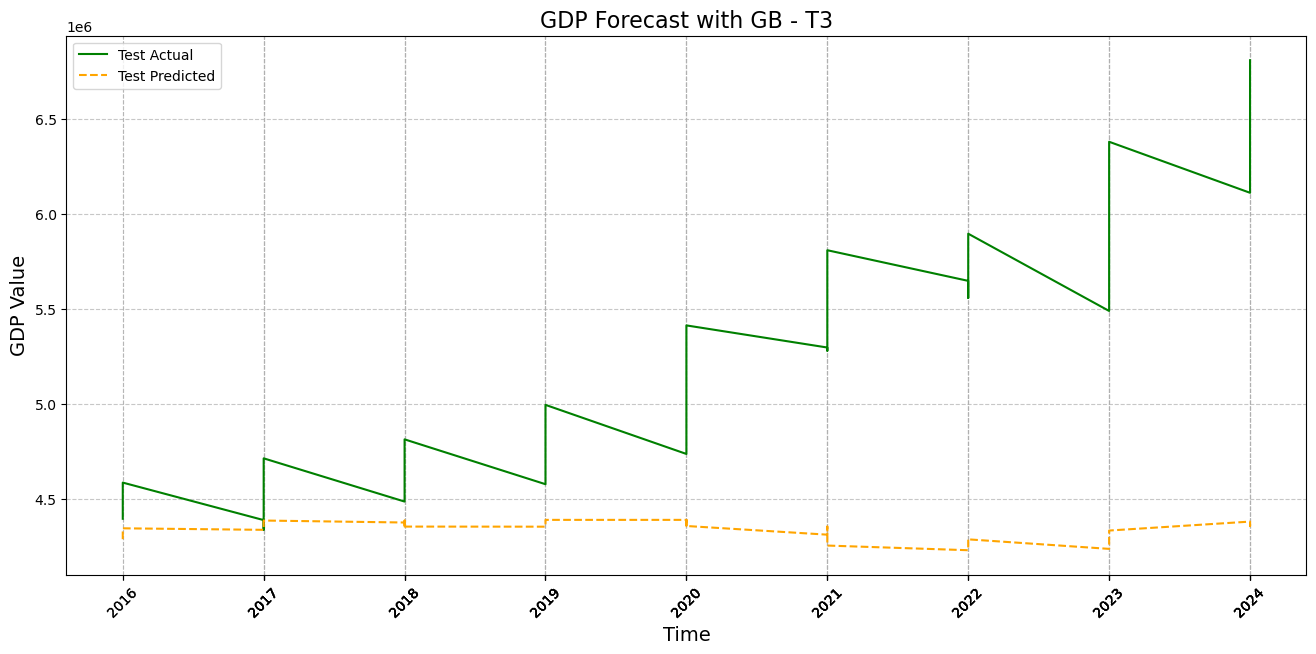

In [59]:
plot_gdp_forecast(y_mix_gdp['年份'],"GB - T3",real_test_y,gb_y_test_pred)

## Xgb

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [500, 1000],
    "learning_rate": [0.01, 0.1],
    "max_depth": [6, 8, 10],
    "subsample": [0.7, 0.85, 0.95],
    "colsample_bytree": [0.6, 1.0],
    "min_child_weight": [3, 5, 7],
    "gamma": [0, 0.3],
    "reg_alpha": [0,1],
    "reg_lambda": [1,3]
}


xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # 或 "neg_mean_absolute_error"
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(train_x_t3, train_y_t3)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.85; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, m

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.6, 1.0], 'gamma': [0, 0.3], 'learning_rate': [0.01, 0.1], 'max_depth': [6, 8, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [36]:
print("✅ 最佳參數組合：", grid_search.best_params_)
print("📉 最佳分數（MSE）：", -grid_search.best_score_)

✅ 最佳參數組合： {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 0.7}
📉 最佳分數（MSE）： 0.003381730409196624


In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [30]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.7,
    colsample_bytree=0.6,
    min_child_weight=3,
    gamma=0,
    random_state=42,
    reg_alpha=0,        
    reg_lambda=3,
)

xgb_model.fit(train_x_t3, train_y_t3)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
# 預測
xgb_y_train_pred = xgb_model.predict(train_x_t3)
xgb_y_test_pred = xgb_model.predict(test_x_t3)

xgb_y_train_pred = scaler_y.inverse_transform(xgb_y_train_pred.reshape(-1, 1))
xgb_y_test_pred = scaler_y.inverse_transform(xgb_y_test_pred.reshape(-1, 1))

In [32]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, xgb_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, xgb_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 7851121.81, RMSE: 2801.99, MAE: 1888.88

📊 測試集表現：
Test ➤ MSE: 1346644332932.60, RMSE: 1160450.06, MAE: 912547.28


(1346644332932.5957, 1160450.0561991436, 912547.2794117647)

In [33]:
print(f"\n📊 預測的平均值：{xgb_y_test_pred.mean():.2f}")


📊 預測的平均值：4328625.00


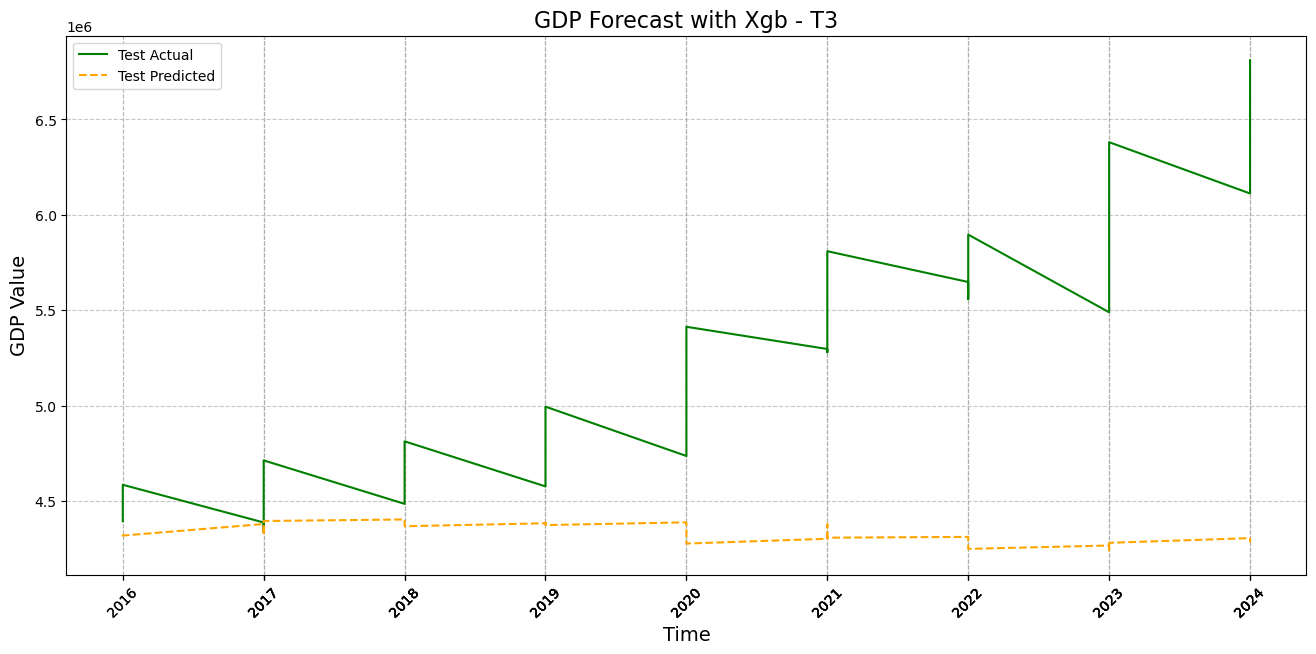

In [55]:
plot_gdp_forecast(y_mix_gdp['年份'],"Xgb - T3",real_test_y,xgb_y_test_pred)

## RF

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [500,1000],
    "max_depth": [6, 8, 10],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1,4],
    "max_features": [0.6,1.0]
}
rf_model = RandomForestRegressor(random_state=42)

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # 或 'neg_mean_absolute_error'
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(train_x_t3, train_y_t3)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.5s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.5s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.1s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.0s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.1s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.1s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.0s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.6s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.1s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.6s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.9s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.5s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   5.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   5.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   5.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   5.9s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   6.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   5.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.1s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.0s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   4.5s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.1s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.6s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.8s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.5s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.1s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.0s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.2s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.2s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.1s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.9s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.9s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.0s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.1s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.6s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.9s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.5s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.2s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.2s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.5s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.5s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.6s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.9s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.5s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.1s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.9s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.0s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.0s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.2s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   4.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.1s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.6s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.2s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.6s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [6, 8, ...], 'max_features': [0.6, 1.0], 'min_samples_leaf': [1, 4], 'min_samples_split': [2, 4, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,1000


In [43]:
print("✅ 最佳參數組合：", grid_search.best_params_)
print("📉 最佳分數（MSE）：", -grid_search.best_score_)

✅ 最佳參數組合： {'max_depth': 6, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
📉 最佳分數（MSE）： 0.004081299432947337


In [36]:
rf_model = RandomForestRegressor(
    n_estimators=1000, 
    min_samples_leaf=1,
    max_depth =6,
    min_samples_split =2,   
    max_features=0.6, 
    random_state=42
)
rf_model.fit(train_x_t3, train_y_t3)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,1000
,criterion,'squared_error'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
# 預測
rf_y_train_pred = rf_model.predict(train_x_t3)
rf_y_test_pred = rf_model.predict(test_x_t3)


rf_y_train_pred = scaler_y.inverse_transform(rf_y_train_pred.reshape(-1, 1))
rf_y_test_pred = scaler_y.inverse_transform(rf_y_test_pred.reshape(-1, 1))

In [38]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, rf_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, rf_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 764901853.24, RMSE: 27656.86, MAE: 20967.04

📊 測試集表現：
Test ➤ MSE: 1512555718318.35, RMSE: 1229860.04, MAE: 1004625.48


(1512555718318.352, 1229860.040133979, 1004625.47504183)

In [39]:
print(f"\n📊 預測的平均值：{rf_y_test_pred.mean():.2f}")


📊 預測的平均值：4236315.79


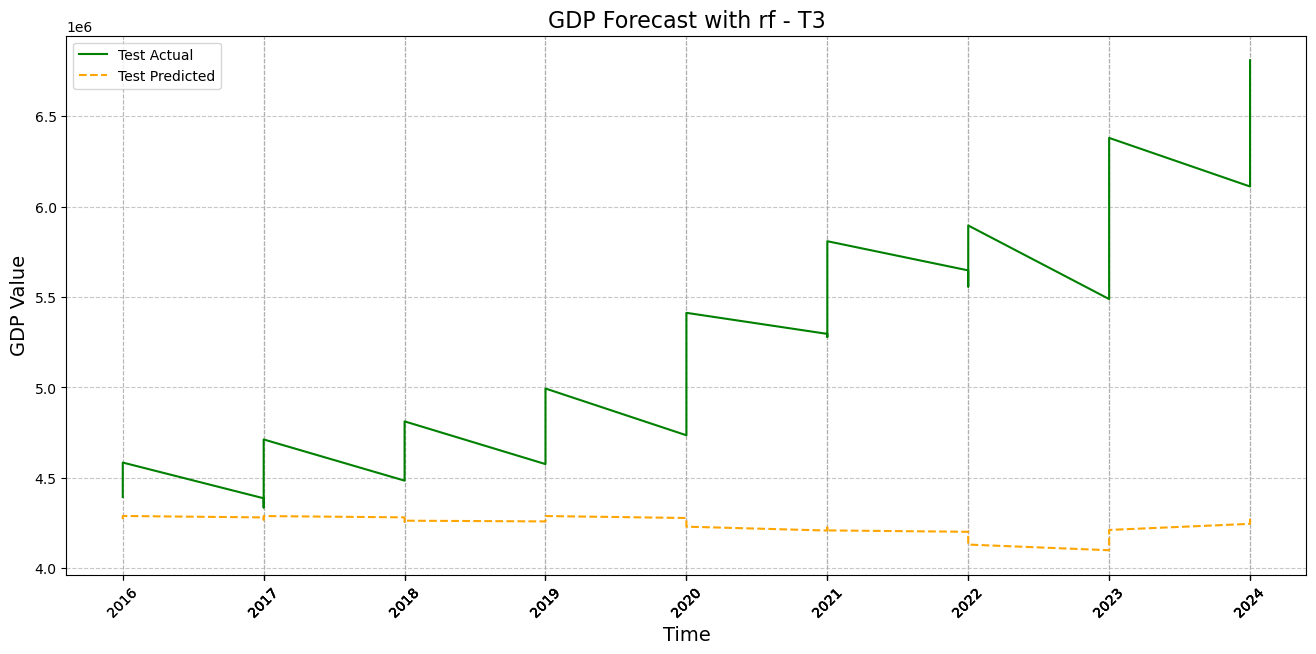

In [51]:
plot_gdp_forecast(y_mix_gdp['年份'],"rf - T3",real_test_y,rf_y_test_pred)